<h1><center>Tarea 9: Algoritmos Genéticos</center></h1>
<p><center><b>Adrián Rubén Bedón Campaña</b></center></p>
<p><center><b>Xavier Alejandro Ramos Vásconez</b></center></p>

<h4><b>Importación de librerías</b></h4>

Para la construcción de un algoritmo genético que optimice la función *onemax* se utilizarán las librerías: NumPy *(Construcción y Manipulación de Arreglos)*, MatPlotLib *(Elaboración de gráficas de fitness de las ejecuciones)* y Copy *(Copiado de objetos)*

In [1]:
#Importación de librerías
#|-Creado por: Adrián Bedón
#|-Fecha de última modificación: 07/07/2024
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

<h4><b>Configuraciones iniciales y Definición del problema</b></h4>

<h5><b>Configuraciones</b></h5>
Se define el tamaño de la población para el algoritmo, el número de generaciones que se busca alcanzar dentro del problema para observar su evolución, y la tasa de mutación que se implementará.

<h5><b>Definición del Problema</b></h5>
El problema que se nos proporciona indica que el tamano del arreglo de bits con el que se va a trabajar tiene un tamaño de 20,y que el tamño de la población inicial será de 10 individuos.

In [2]:
#Configuraciones iniciales y Definición del problema
#|-Creado por: Adrián Bedón
#|-Fecha de última modificación: 07/07/2024
n_pop = 10 #Número de individuos de la población inicial
n_bits = 20 #Número de bits
pop_size = 100 #Tamaño de la población para el algoritmo
generations = 500 #Número de generaciones
mutation_rate = 0.1 #Tasa de mutación

<h4><b>Definición de funciones</b></h4>

Dentro de esta sección se definen las funciones que se utilizarán dentro del algoritmo genético que se construirá, de las cuales podemos mencionar:
- onemax(): Función que se busca optimizar.
- roulette(): Función de ruleta que selecciona un individuo de manera aleatoria basada en el fitness.
- crossover(): Función de cruce donde se seleeciona dos individuos padres para generar un individuo hijo.
- mutation(): Función de mutación para verificar si un indiviudo muta o no.

In [3]:
#Definición de funciones
#|-Creado por: Adrián Bedón
#|-Fecha de última modificación: 07/07/2024

# Función de fitness
def onemax(pop):
    return np.sum(pop, axis=1)

# Función de selección por ruleta
def roulette(fitness):
    total_fit = np.sum(fitness)
    pick = np.random.rand() * total_fit
    current = 0
    for i, fit in enumerate(fitness):
        current += fit
        if current > pick:
            return i
    return len(fitness) - 1

# Función de cruce (crossover)
def crossover(parent1, parent2):
    point = np.random.randint(1, n_bits-1) #Selección de padres de manera aleatoria
    child1 = np.concatenate((parent1[:point], parent2[point:]))
    child2 = np.concatenate((parent2[:point], parent1[point:]))
    return child1, child2

# Función de mutación
def mutation(individual, rate):
    for i in range(len(individual)):
        if np.random.rand() < rate: #Obtención de valor para saber si se aplica o no la mutación
            individual[i] = 1 - individual[i]
    return individual

<h4><b>Definición del algoritmo</b></h4>

El algoritmo que se ha construido se encuentra basado en el código proporcionado por el docente y el mismo ha sido adaptado para la problemática entregada, para las diferentes ejecuciones que se realizarán dentro de este trabajo se plantea experimentar con la implementación de elitismo para ver la forma en el que esto influye en la evolución del algoritmo.

In [4]:
#Definición de funciones
#|-Creado por: Adrián Bedón
#|-Fecha de última modificación: 07/07/2024

all_evolutions = []
for run in range(5):

    # Crear población inicial
    population = np.random.randint(0, 2, (pop_size, n_bits))
    new_population = np.zeros((pop_size, n_bits), dtype=int)
    evolution = []

    for gen in range(generations):
        # Evaluación de soluciones
        fitness_values = onemax(population)
        max_fitness, best_idx = np.max(fitness_values), np.argmax(fitness_values)
        evolution.append(max_fitness)
        best_individual = deepcopy(population[best_idx, :])

        # Crossover
        for i in range(0, pop_size, 2):
            parent1 = population[roulette(fitness_values), :]
            parent2 = population[roulette(fitness_values), :]
            new_population[i:i+2, :] = crossover(parent1, parent2)

        # Mutation
        for i in range(pop_size):
            population[i, :] = mutation(new_population[i, :], mutation_rate)

        if run % 2 == 0:
            # Elitism
            min_fitness, worst_idx = np.min(onemax(population)), np.argmin(onemax(population))
            population[worst_idx, :] = best_individual

    # Verificación final
    final_fitness_values = onemax(population)
    max_fitness, best_idx = np.max(final_fitness_values), np.argmax(final_fitness_values)
    evolution.append(max_fitness)

    all_evolutions.append(evolution)

<h5><b>Gráficas</b></h5>

Se llevo a cabo la representación gráfica de las dieferente ejecuciones con el fin de evaluar sus resultados y determinar posibles conclusiones sobre estos resultados.

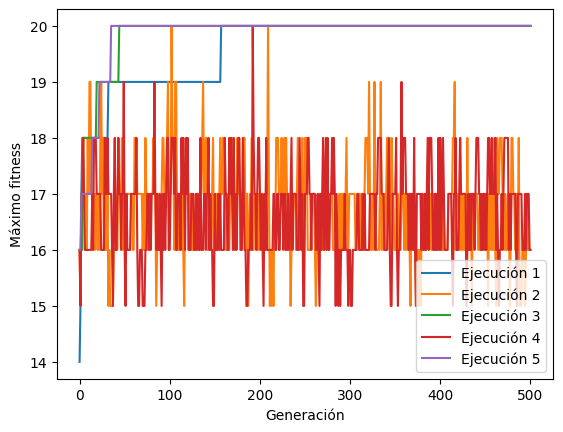

El mejor individuo es: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] con fitness de 20


In [5]:
# Plot de la evolución
for i, evolution in enumerate(all_evolutions):
    plt.plot(range(generations+1), evolution, label=f'Ejecución {i+1}')

plt.xlabel('Generación')
plt.ylabel('Máximo fitness')
plt.legend()
plt.show()

print(f'El mejor individuo es: {population[best_idx]} con fitness de {max_fitness}')

<h5><b>Análisis de Resultados</b></h5>

se puede observar que las diferentes ejecuciones son volátiles 